In [2]:
!pip install kaggle --upgrade
#https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

Requirement already up-to-date: kaggle in /anaconda3/envs/learn-env/lib/python3.6/site-packages (1.5.6)


In [4]:
from fsds_100719.imports import *
import os,glob

fsds_1007219  v0.7.21 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [5]:
cmd = "kaggle datasets download -d allen-institute-for-ai/CORD-19-research-challenge"
os.system(cmd)

256

In [6]:
# import os

In [7]:
os.listdir()

['COVID19_open_line_list.csv',
 'time_series_covid_19_confirmed_US.csv',
 'time_series_covid_19_recovered.csv',
 '.DS_Store',
 'time_series_covid_19_deaths_US.csv',
 'covid_19_data.csv',
 'coronavirus.ipynb',
 'coronavirus-plotly.ipynb',
 'COVID19_line_list_data.csv',
 'README.md',
 '.gitignore',
 'time_series_covid_19_deaths.csv',
 'JMI_us_states.csv',
 'novel-corona-virus-2019-dataset.zip',
 '.gitattributes',
 '.ipynb_checkpoints',
 'novel-corona-virus-2019-dataset',
 '.git',
 'CORD-19-research-challenge.zip',
 'time_series_covid_19_confirmed.csv']

In [8]:
os.listdir('novel-corona-virus-2019-dataset/')
# os.system('kaggle datasets download -d sudalairajkumar/novel-corona-virus-2019-dataset')

['COVID19_open_line_list.csv',
 'time_series_covid_19_recovered.csv',
 'covid_19_data.csv',
 'COVID19_line_list_data.csv',
 'time_series_covid_19_deaths.csv',
 'time_series_covid_19_confirmed.csv']

In [9]:
help(pd.melt)

Help on function melt in module pandas.core.reshape.melt:

melt(frame, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None)
    Unpivot a DataFrame from wide format to long format, optionally
    leaving identifier variables set.
    
    This function is useful to massage a DataFrame into a format where one
    or more columns are identifier variables (`id_vars`), while all other
    columns, considered measured variables (`value_vars`), are "unpivoted" to
    the row axis, leaving just two non-identifier columns, 'variable' and
    'value'.
    
    Parameters
    ----------
    frame : DataFrame
    id_vars : tuple, list, or ndarray, optional
        Column(s) to use as identifier variables.
    value_vars : tuple, list, or ndarray, optional
        Column(s) to unpivot. If not specified, uses all columns that
        are not set as `id_vars`.
    var_name : scalar
        Name to use for the 'variable' column. If None it uses
        ``frame.columns.nam

## Time Series - Confirmed

In [10]:
df = pd.read_csv('novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv')
display(df.head())
df =pd.melt(df,id_vars=df.columns[:4],var_name='Date',value_name='Confirmed')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238


,Province/State,Country/Region,Lat,Long,Confirmed
Date,,,,,
2020-01-22,NaN,Thailand,15.0000,101.0000,2
2020-01-22,NaN,Japan,36.0000,138.0000,2
2020-01-22,NaN,Singapore,1.2833,103.8333,0
2020-01-22,NaN,Nepal,28.1667,84.2500,0
2020-01-22,NaN,Malaysia,2.5000,112.5000,0


## Main Dataset

In [11]:
df_ = pd.read_csv('novel-corona-virus-2019-dataset/covid_19_data.csv',index_col=0)
df_

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
6718,03/18/2020,NaN,Guernsey,2020-03-17T18:33:03,0.0,0.0,0.0
6719,03/18/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
6720,03/18/2020,NaN,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0


In [12]:
# ## KAGGLE DATASET COMMAND LINE VERS
# df = pd.read_csv('2020-03-13/all_sources_metadata_2020-03-13.csv')

# df.head()

In [13]:
## NEW DATA TO LOAD IN
df_ts_dead = pd.read_csv('novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv')
df_ts_recover = pd.read_csv('novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv')
df_ts_conf = pd.read_csv('novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv')


df_dict = dict(confirmed =df_ts_conf,dead=df_ts_dead,recovered=df_ts_recover)

for k,_df in df_dict.items():
    _df = pd.melt(_df,id_vars=['Province/State','Country/Region','Lat','Long'], var_name='Day', value_name=k)
    _df['Day']= pd.to_datetime(_df['Day'])
    _df.set_index(['Country/Region','Province/State','Day'],inplace=True)
    df_dict[k] = _df.drop(columns=['Lat','Long'])


In [14]:
df_dict['dead']
df = pd.concat(list(df_dict.values()),axis=1)

df = df.reset_index().set_index("Day")

df.head()

,Country/Region,Province/State,confirmed,dead,recovered
Day,,,,,
2020-01-22,Afghanistan,NaN,0,0,0
2020-01-23,Afghanistan,NaN,0,0,0
2020-01-24,Afghanistan,NaN,0,0,0
2020-01-25,Afghanistan,NaN,0,0,0
2020-01-26,Afghanistan,NaN,0,0,0


## BOOKMARK

In [15]:
def get_country_ts(df, country,group_col='Country/Region',ts_col='Cases'):
    ts = df.groupby(group_col).get_group(country )
    # ts.set_index('date',inplace=True)

    if ts_col is not None:
        return ts[ts_col]
    else:
        return ts

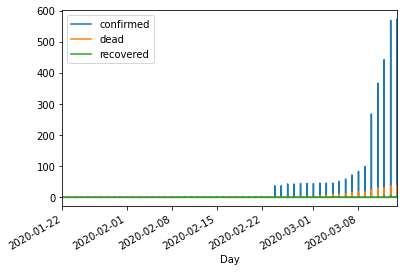

In [16]:
get_country_ts(df,'US',ts_col=None)[['confirmed','dead','recovered']].plot()

## OLD CODE BELOW

In [17]:
df_ts_conf = pd.read_csv('novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv')
df_ts_conf

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,NaN,Saint Lucia,13.9094,-60.9789,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
438,NaN,Saint Vincent and the Grenadines,12.9843,-61.2872,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
439,NaN,Suriname,3.9193,-56.0278,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
440,"Virgin Islands, U.S.",US,18.3358,-64.8963,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
df = pd.melt(df_ts_conf,id_vars=['Province/State','Country/Region','Lat','Long'], var_name='Day', value_name='Cases')
df

,Province/State,Country/Region,Lat,Long,Day,Cases
0,NaN,Thailand,15.0000,101.0000,1/22/20,2
1,NaN,Japan,36.0000,138.0000,1/22/20,2
2,NaN,Singapore,1.2833,103.8333,1/22/20,0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0
...,...,...,...,...,...,...
23421,NaN,Saint Lucia,13.9094,-60.9789,3/14/20,1
23422,NaN,Saint Vincent and the Grenadines,12.9843,-61.2872,3/14/20,1
23423,NaN,Suriname,3.9193,-56.0278,3/14/20,1
23424,"Virgin Islands, U.S.",US,18.3358,-64.8963,3/14/20,1


In [19]:
df['date'] = pd.to_datetime(df['Day'])


In [20]:
sorted(df['Country/Region'].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Chile',
 'China',
 'Colombia',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cruise Ship',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Finland',
 'France',
 'French Guiana',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guadeloupe',
 'Guatemala',
 'Guernsey',
 'Guinea',
 'Guyana',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jersey',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Korea, South',
 'Kuwait',
 '

In [21]:
TS = {}
for country in df.groupby('Country/Region').groups:
    ts_temp = df.groupby('Country/Region').get_group(country)
    ts_temp.set_index('date',inplace=True)
    TS[country] =ts_temp

In [22]:
def get_country_ts(df, country,group_col='Country/Region',ts_col='Cases'):
    ts = df.groupby(group_col).get_group(country )
    ts.set_index('date',inplace=True)

    if ts_col is not None:
        return ts[ts_col]
    else:
        return tsx
usa = get_country_ts(df,'US')
usa




date
2020-01-22    0
2020-01-22    0
2020-01-22    0
2020-01-22    0
2020-01-22    0
             ..
2020-03-14    0
2020-03-14    0
2020-03-14    6
2020-03-14    3
2020-03-14    1
Name: Cases, Length: 13038, dtype: int64

In [23]:

usa.iloc[-10:]

date
2020-03-14    0
2020-03-14    0
2020-03-14    0
2020-03-14    0
2020-03-14    0
2020-03-14    0
2020-03-14    0
2020-03-14    6
2020-03-14    3
2020-03-14    1
Name: Cases, dtype: int64

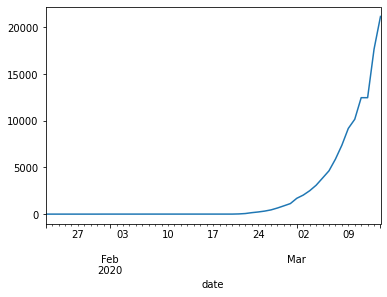

In [24]:
italy = get_country_ts(df,'Italy')
italy.plot()

In [25]:
def get_country_cum_ts(df, group='US'):
    US = df.groupby('Country/Region').get_group(group)
    US.set_index('date',inplace=True)
    ts_us = US.drop(columns=['Province/State','Day','Country/Region'])['Cases'].cumsum()#.plot()
    return ts_us

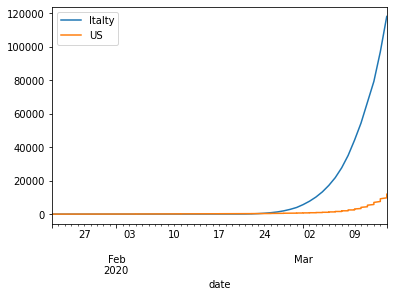

In [26]:
ts_it = get_country_cum_ts(df,'Italy')
ts_us = get_country_cum_ts(df,'US')
ts_ch = get_country_cum_ts(df,'China')
ts_ko = get_country_cum_ts(df,'Korea, South')
ts_it.plot(label='Italty')
ts_us.plot(label='US')
plt.legend()

In [27]:
ts_it.head()

date
2020-01-22    0
2020-01-23    0
2020-01-24    0
2020-01-25    0
2020-01-26    0
Name: Cases, dtype: int64

In [29]:

# ts_df = pd.concat([ts_us,ts_it,ts_ch,ts_ko],axis=1)
# ts_df.plot(subplots=True)

In [ ]:
# US = df.groupby('Country/Region').get_group('US')
# US.set_index('date',inplace=True)
# ts_us = US.drop(columns=['Province/State','Day','Country/Region'])['Cases'].cumsum()#.plot()
# ts_us.plot()

In [ ]:
# IT = df.groupby('Country/Region').get_group('Italy')
# IT.set_index('date',inplace=True)
# ts_it = IT.drop(columns=['Province/State','Day','Country/Region'])['Cases'].cumsum()#.plot()

In [ ]:
# pd.concat

In [ ]:
ts_it.plot(label='Italy')
ts_us.plot(label='US')
# ts_ch.plot(label='China')
plt.legend()

In [ ]:
fig, ax = plt.subplots()
for country in TS:
    TS[country]['Cases'].cumsum().plot(label=country,ax=ax)

ax.legend(bbox_to_anchor=(1.1, 1.05))


# plt.legend()